## Name : Srishti Hedaoo

### Graduate Rotational Internship Program - The Sparks Foundation

## Task 2 : Predict the optimum number of clusters¶

#### Importing all necessary libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing the Iris dataset

In [75]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df.shape

(150, 6)

In [ ]:
# This dataset consists of 150 samples
# 4 columns are the properties of flower
# The response variable is species which is further divided into classes
# 1st column is basically Id and is of no use, hence we can drop it

#### Drop Id column

In [76]:
df = df.drop(["Id"],1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# Changing Column names

df.columns = ["Sepal_length","Sepal_width" ,"Petal_length","Petal_width","Species"]
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

#### Plotting the data using 2 variables

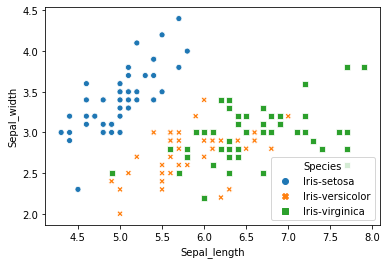

In [38]:
sns.scatterplot(x = 'Sepal_length', y = 'Sepal_width', data = df , hue = 'Species', style = 'Species')

The dataset consists of 3 classes Iris-setosa, Iris-versicolor and Iris-virginica
But two of the classes i.e. Iris-versicolor and Iris-virginica are overlapping each other
So, it is difficult to determine the number of cluster through this

#### Pairplot 

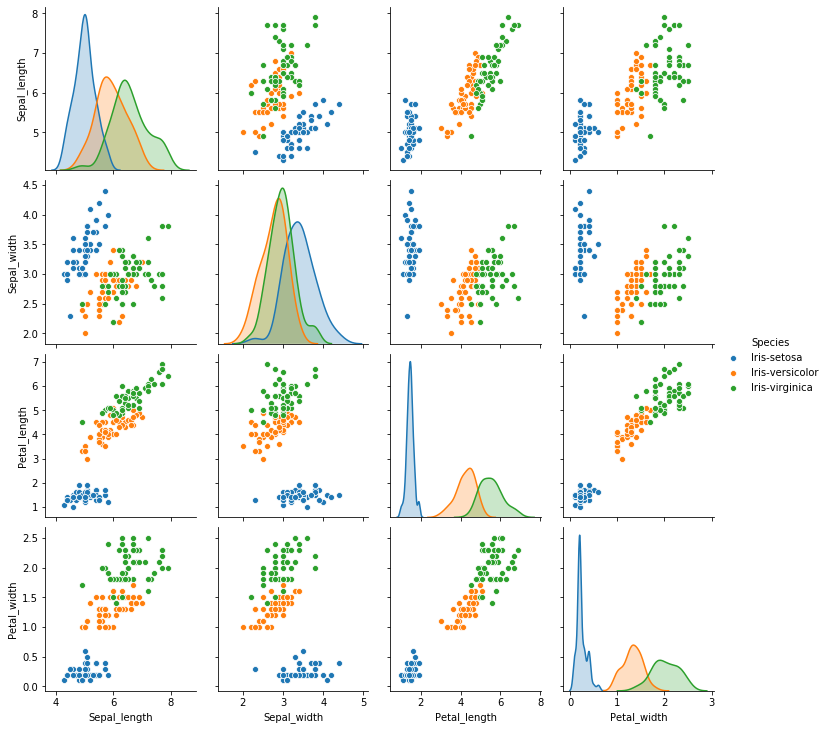

In [39]:
sns.pairplot(df , hue = 'Species')

#### Seperating the regressors and response variable 

In [77]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Principal Component Analysis (PCA)

Evaluating prinicipal components corresponding to the regressor variables for dimensionality reduction and to distinguish between the clusters. Principal component analysis requires the dataset to be standardized

### Standardizing the dataset

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)  # standardized X

### Computing eigenvectors and eigenvalues

In [42]:
# Covariance matrix

covariance_matrix = np.cov(X.T)
print("Covariace matrix: \n", covariance_matrix)
print()

# Eigenvectors and eigenvalues

eigen_values , eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors : \n", eigen_vectors , "\n")
print("Eigenvalues : \n", eigen_values , "\n")

Covariace matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]

Eigenvectors : 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues : 
 [2.93035378 0.92740362 0.14834223 0.02074601] 



###  Picking Principal Components Using the Explained Variance

In [43]:
# Eigen values

for val in eigen_values:
    print(val)

2.9303537755893165
0.9274036215173417
0.1483422264816399
0.02074601399559571


In [44]:
# Variance explained
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[72.77045209380134, 23.030523267680643, 3.683831957627389, 0.5151926808906266]

In [45]:
# Cumulative variance explained
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

Almost 95% variation is explained by first 2 principal components

###  Explained variance vs Number of components plot

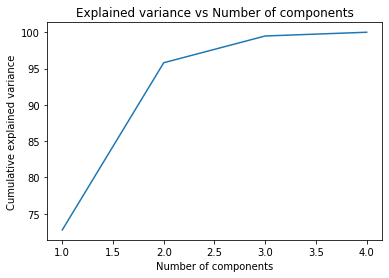

In [46]:
sns.lineplot(x = [1,2,3,4] , y = cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

### Projection of data onto lower dimensional linear space 

In [47]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [48]:
X_pca = X.dot(projection_matrix)

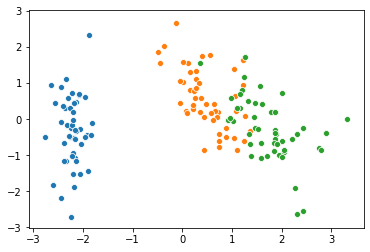

In [64]:
for species in ('Iris-setosa','Iris-versicolor' ,'Iris-virginica'):
    sns.scatterplot(X_pca[y == species, 0],
                   X_pca[y == species , 1])

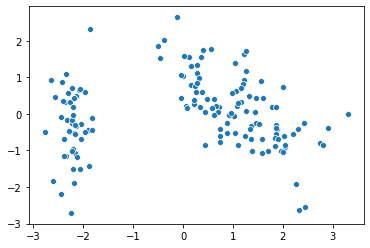

In [51]:
sns.scatterplot(X_pca[:,0],X_pca[:,1])

### Close or overlapping clusters idicate correlated variables with low in-class variance, but not a good separation. 
### 2 cluster might be better.

## Predicting Number of clusters using KMeans Clustering

In [65]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#### Using Elbow method to determine the optimum number of clusters

In [66]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,16):
    model=KMeans(n_clusters=k)
    model.fit(X)
    wcss.append(model.inertia_)
elbow_df = pd.DataFrame({"Number of clusters" : range(1,16) , "WCSS" : wcss})
elbow_df

,Number of clusters,WCSS
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582
5,6,38.930963
6,7,34.190688
7,8,29.955569
8,9,28.268702
9,10,26.142880


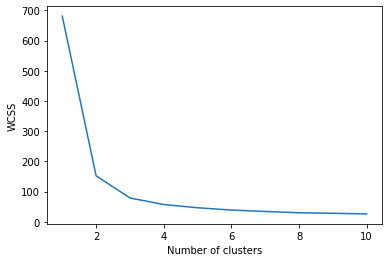

In [67]:
sns.lineplot(x = "Number of clusters", y = "WCSS" , data = elbow_df)
plt.title('Selecting k with the Elbow Method') 

### Optimum number of clusters is a point where wcss does not decrease signficantly 
#### Hence, we choose the number of clusters = 3

In [81]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_pred = kmeans.fit_predict(X)

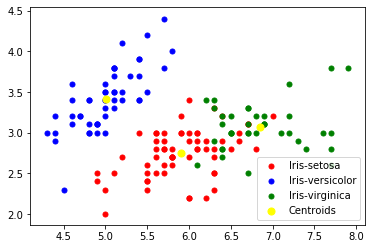

In [82]:
# Visualizing clusters 

species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
color = ['red','blue','green']

for i in range(0,3):
    plt.scatter(X[y_pred == i, 0], X[y_pred == i, 1], 
            s = 25, c = color[i], label = species[i])
    plt.legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')
plt.legend()

## Hierarchical clustering

In [83]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [85]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(X)

complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(X)

avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(X)


ward_score = adjusted_rand_score(y, ward_pred)
complete_score = adjusted_rand_score(y, complete_pred)
avg_score = adjusted_rand_score(y, avg_pred)

print( "Scores: \nWard:", ward_score,"\nComplete: ", complete_score, "\nAverage: ", avg_score)

Scores: 
Ward: 0.615322993214545 
Complete:  0.5726305793711642 
Average:  0.5621364251426576


### Used ward linkage with highest Adjusted Random Score

### Dendrogram 

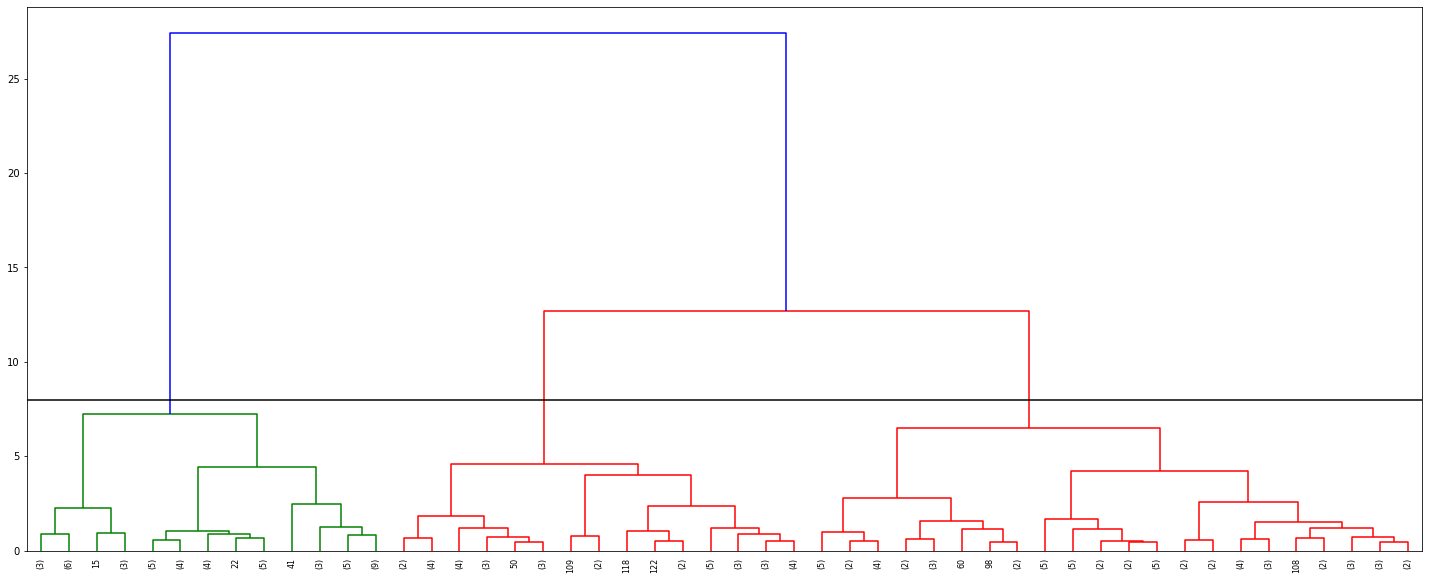

In [87]:
plt.figure(figsize=(25, 10))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = "ward"),leaf_rotation=90, truncate_mode='lastp',p=50, )
plt.axhline(y=8, c='k')

### y = 8 intersect with 3 vertical lines
## Hence, Number of optimum clusters = 3 